# WHO Life Expectancy Predictions using Multiple Linear Regression

### **Table of Contents**
* [<span style="color:#A690A4"> 0. Executive Summary](#exe_sum)
* [<span style="color:#A690A4"> 1. Introduction](#intro)
* [<span style="color:#A690A4"> 2. Collect, Wrangle & Explore](#process)
* [<span style="color:#A690A4"> 3. Predict Life Expectancy](#predict)

# <span style="color:#5E6997">Executive Summary</span> <a class="anchor" id="exe_sum"></a>

# <span style="color:#5E6997">Introduction</span> <a class="anchor" id="intro"></a>

# <span style="color:#5E6997">Collect, Wrangle, and Explore</span> <a class="anchor" id="process"></a>

Import needed libraries and load the dataset.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# import statsmodels.api as sm
# from scipy.stats import pearsonr
# from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from category_encoders.binary import BinaryEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/kaggle/input/life-expectancy-who-updated/Life-Expectancy-Data-Updated.csv', encoding='ISO-8859-1')

df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


Check for null values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [4]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


Let's take a look at data coorelation.

In [5]:
correlation_matrix = df.corr(numeric_only=True)

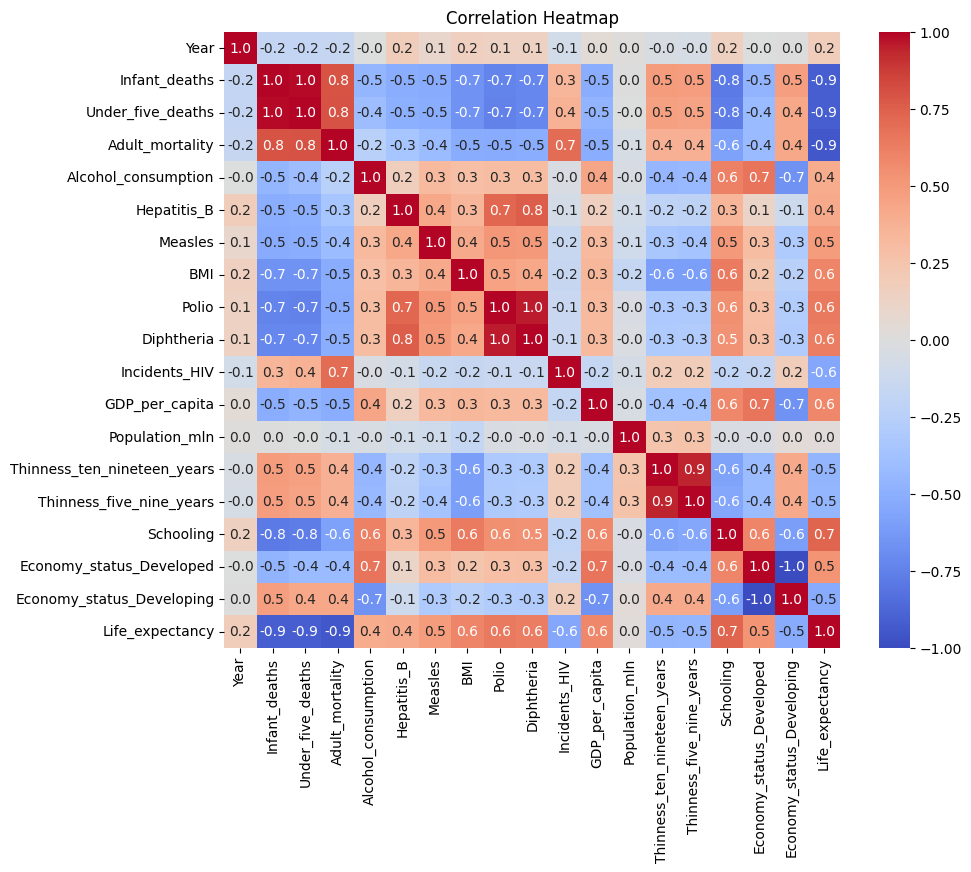

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", square=True)
plt.title("Correlation Heatmap")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


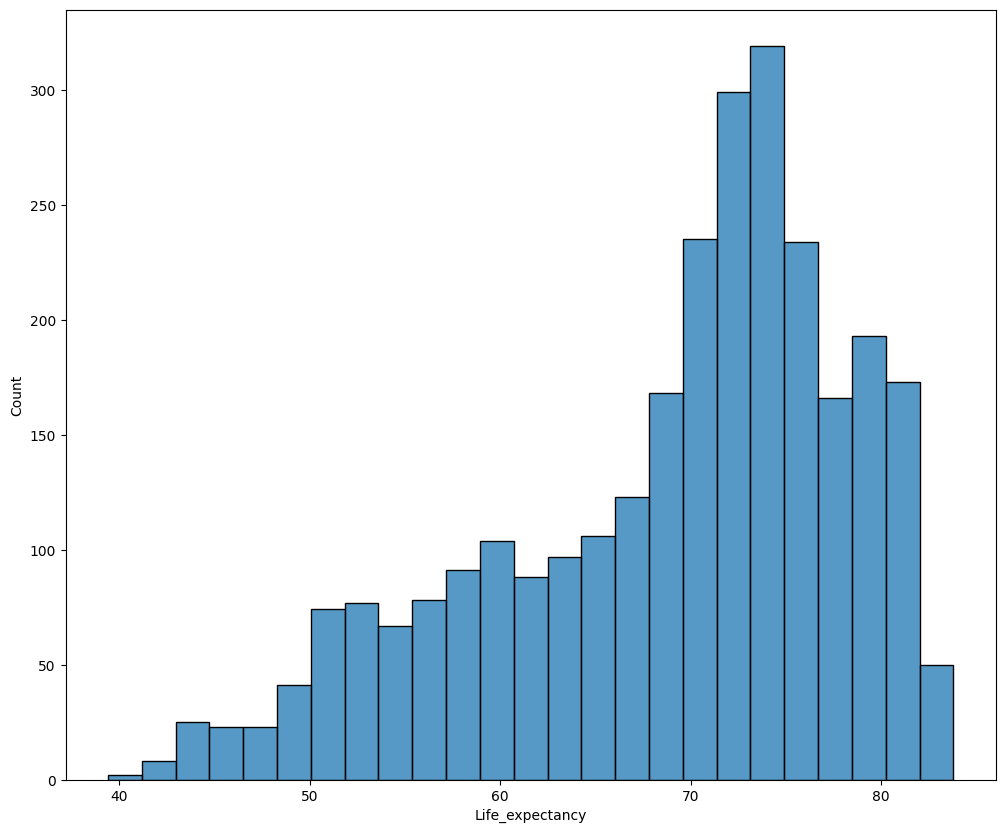

In [7]:
plt.figure(figsize=(12, 10))
sns.histplot(x='Life_expectancy', data=df);

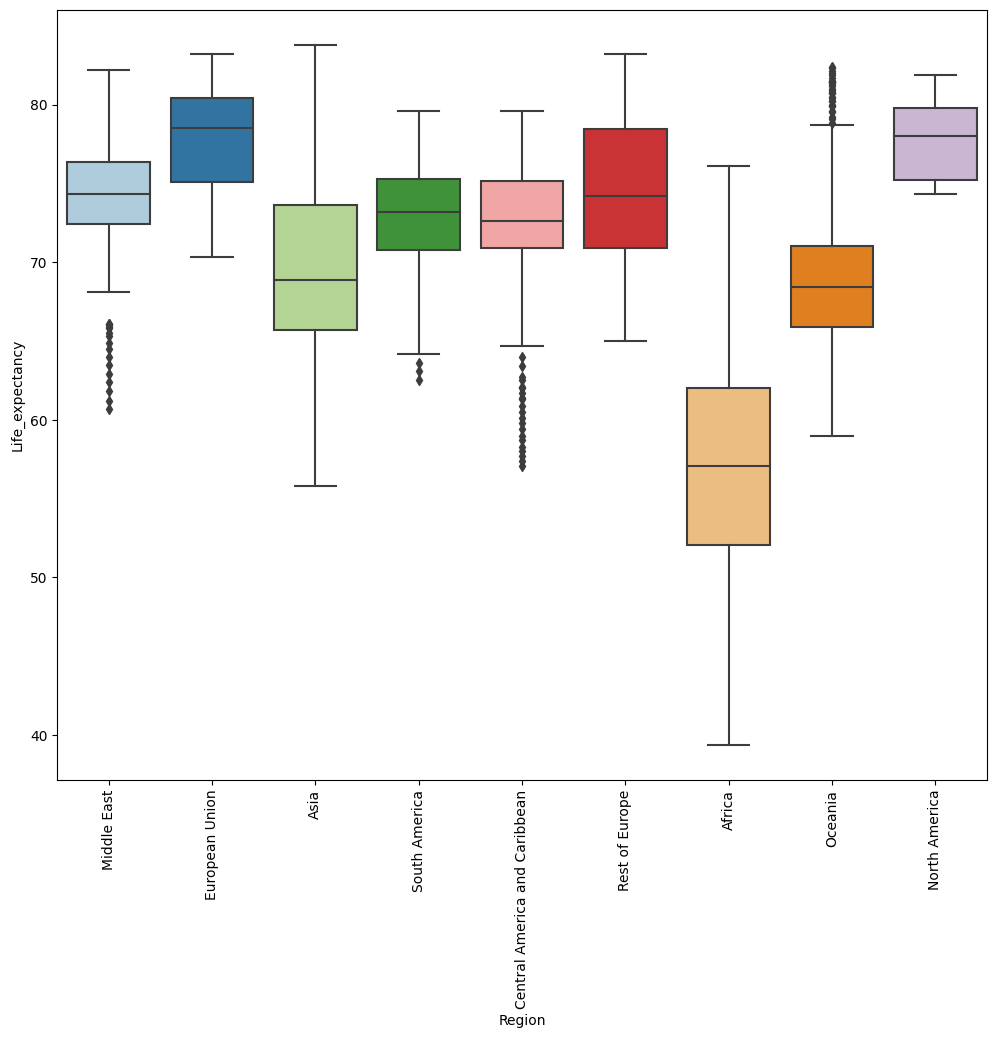

In [8]:
plt.figure(figsize=(12, 10))
sns.boxplot(x=df['Region'], y=df['Life_expectancy'], data=df, palette='Paired')
plt.xticks(rotation=90);

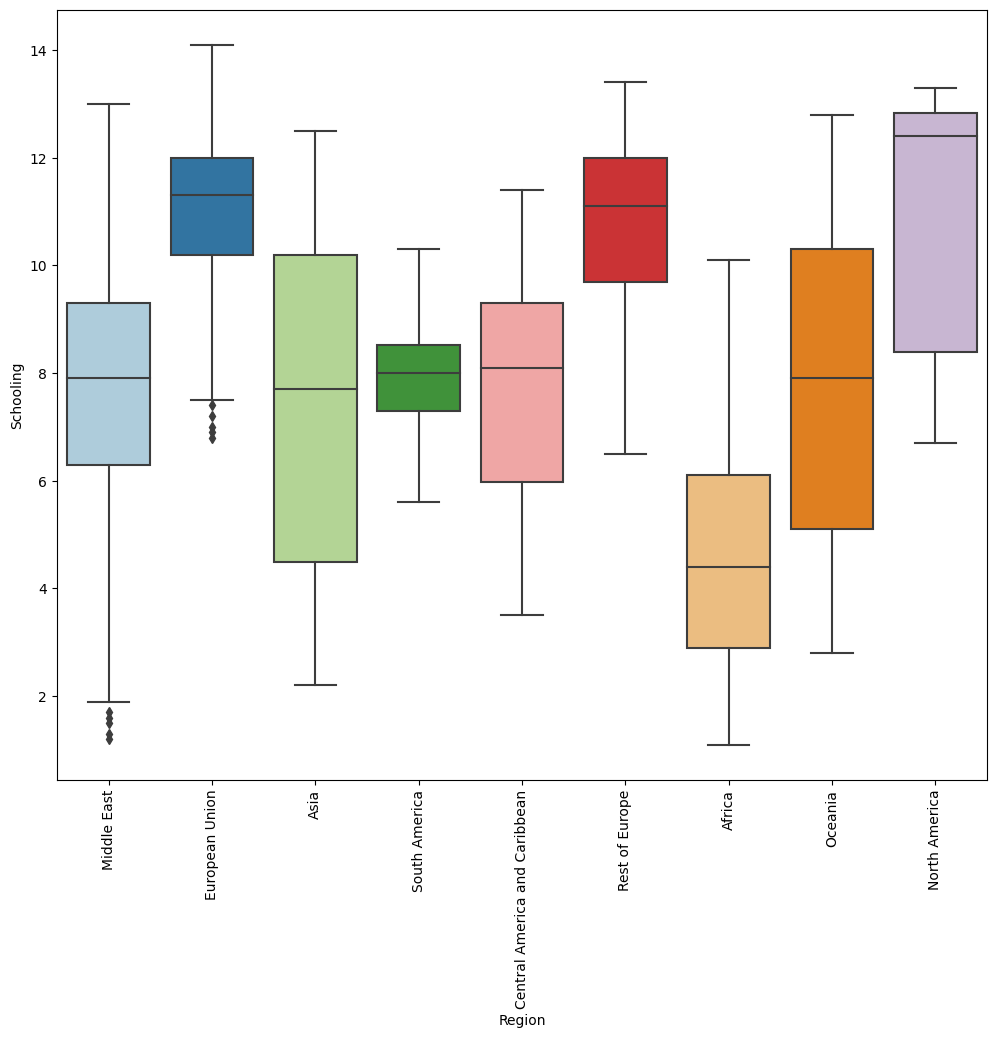

In [9]:
plt.figure(figsize=(12, 10))
sns.boxplot(x=df['Region'], y=df['Schooling'], data=df, palette='Paired')
plt.xticks(rotation=90);

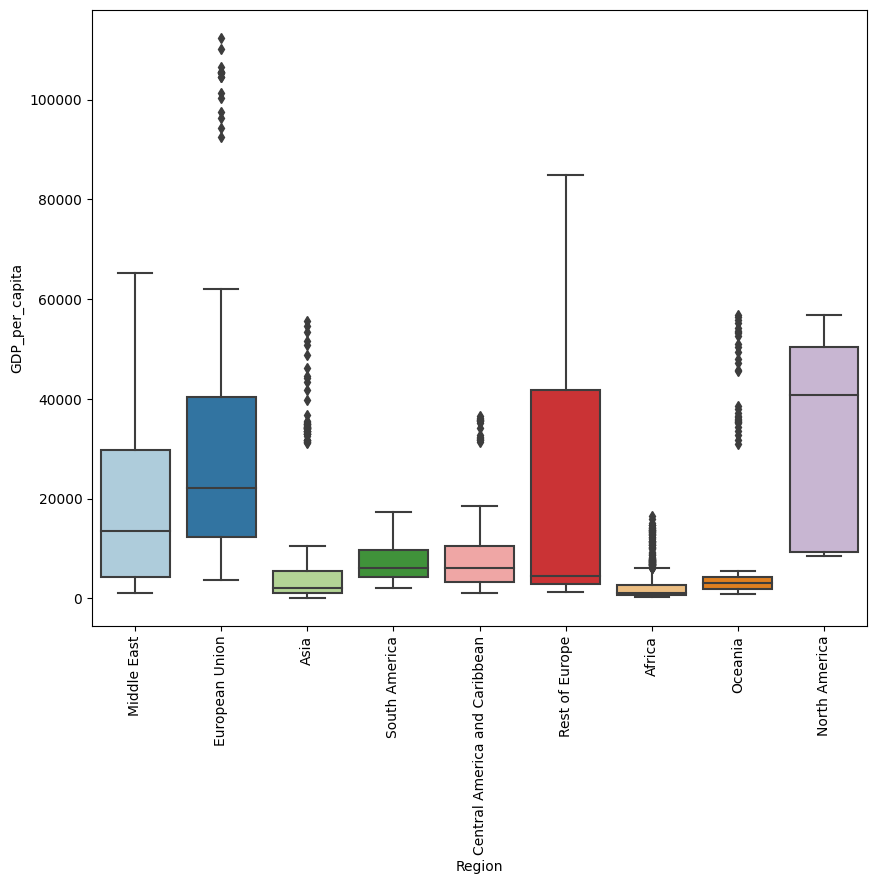

In [10]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['Region'], y=df['GDP_per_capita'], data=df, palette='Paired')
plt.xticks(rotation=90);

Show the GDP for the top 50 countries.

In [11]:
df['Country'].nunique()

179

In [12]:
x_temp = df.groupby('Country')['GDP_per_capita'].max()[120:179]
type(x_temp)

pandas.core.series.Series

In [13]:
y_temp = df.sort_values(by='Country')['Country'].unique()[120:179]
type(y_temp)

numpy.ndarray

In [14]:
temp=df.groupby('Country')['GDP_per_capita'].max().to_frame().sort_values(by='GDP_per_capita', ascending=False)
temp['Country'] = temp.index

y = temp.filter(['Country'], axis=1)
x = temp['GDP_per_capita'].tolist()

<Axes: ylabel='Country'>

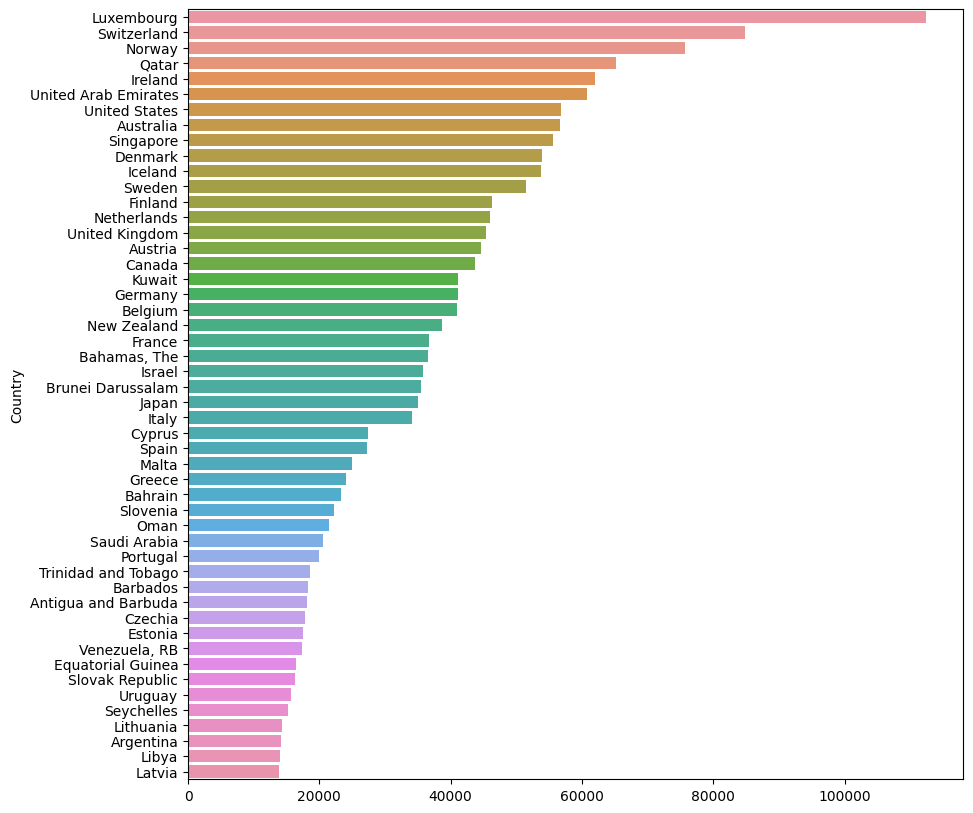

In [15]:
plt.figure(figsize=(10, 10))
sns.barplot(y=y['Country'][0:50], x=x[0:50])

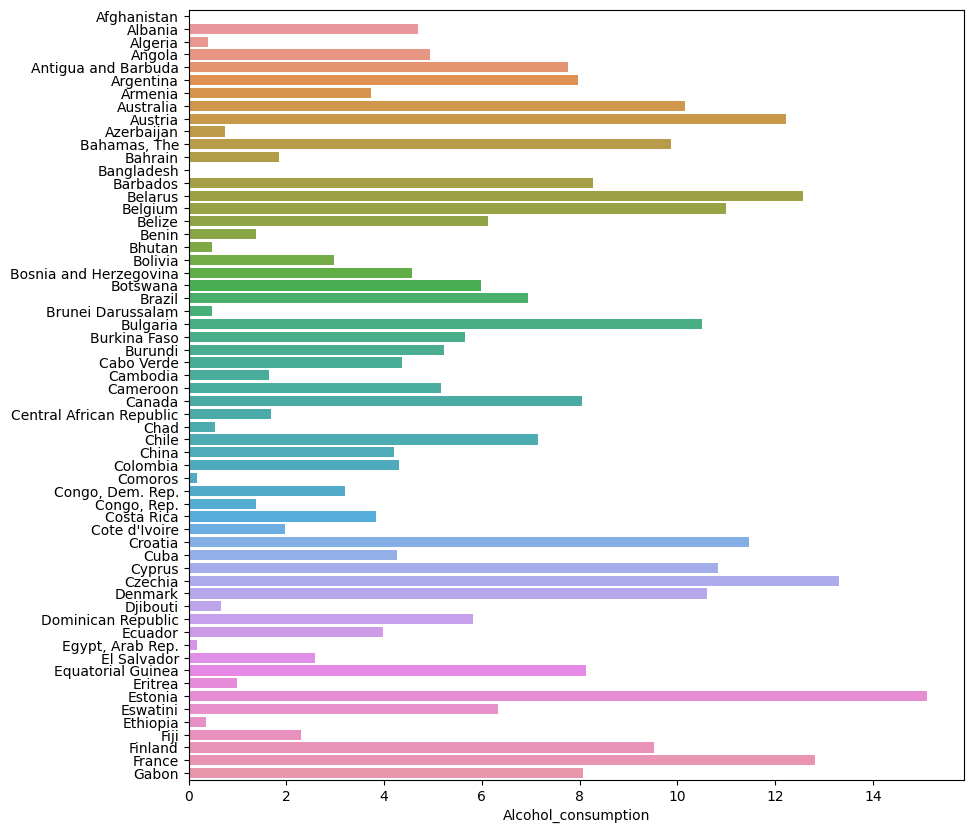

In [16]:
plt.figure(figsize=(10, 10))
sns.barplot(y=df.sort_values(by='Country')['Country'].unique()[:60], x=df.groupby('Country')['Alcohol_consumption'].mean()[:60]);

In [17]:
df.corr(numeric_only=True)['Alcohol_consumption'].sort_values(ascending=False)

Alcohol_consumption            1.000000
Economy_status_Developed       0.670366
Schooling                      0.615728
GDP_per_capita                 0.443966
Life_expectancy                0.399159
Measles                        0.318603
Polio                          0.301926
Diphtheria                     0.299016
BMI                            0.284032
Hepatitis_B                    0.168436
Year                          -0.000611
Incidents_HIV                 -0.034118
Population_mln                -0.039119
Adult_mortality               -0.244794
Under_five_deaths             -0.409367
Thinness_five_nine_years      -0.433030
Thinness_ten_nineteen_years   -0.446366
Infant_deaths                 -0.454526
Economy_status_Developing     -0.670366
Name: Alcohol_consumption, dtype: float64

I will need to change the datatype of 'Country' and 'Region'.
Create dummy features to represent the 'Region' feature.

<Axes: xlabel='Alcohol_consumption', ylabel='Adult_mortality'>

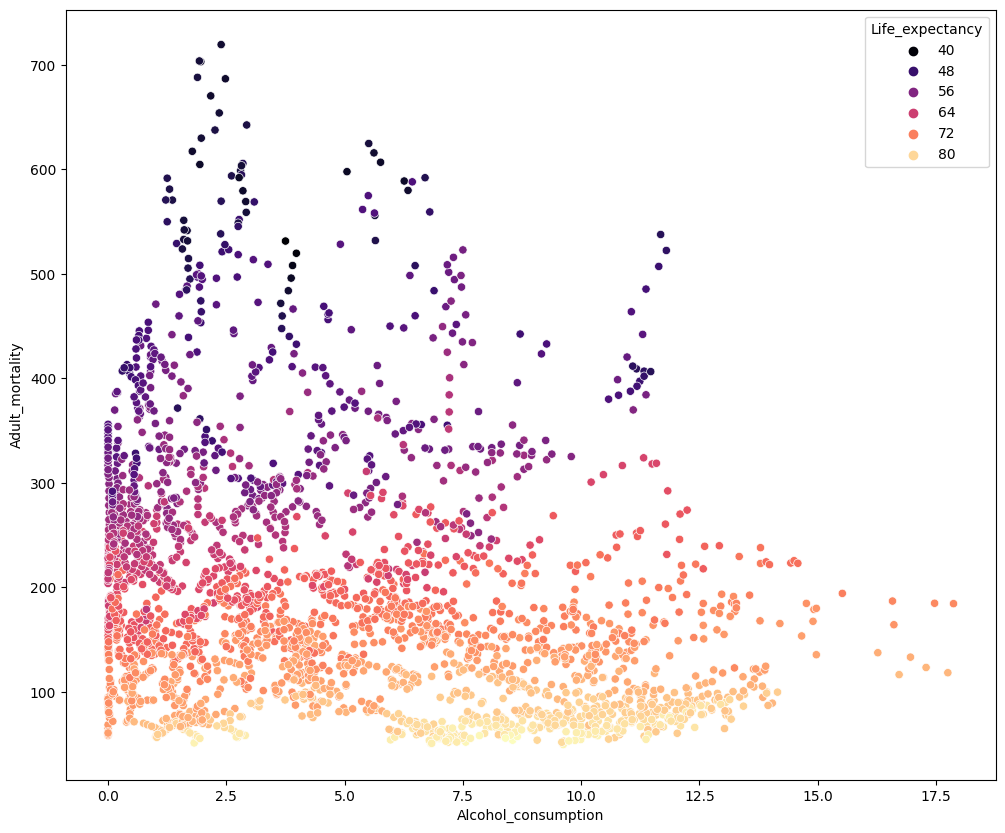

In [18]:
plt.figure(figsize=(12, 10), dpi=100)
sns.scatterplot(x=df['Alcohol_consumption'], y=df['Adult_mortality'], hue=df['Life_expectancy'], palette='magma')

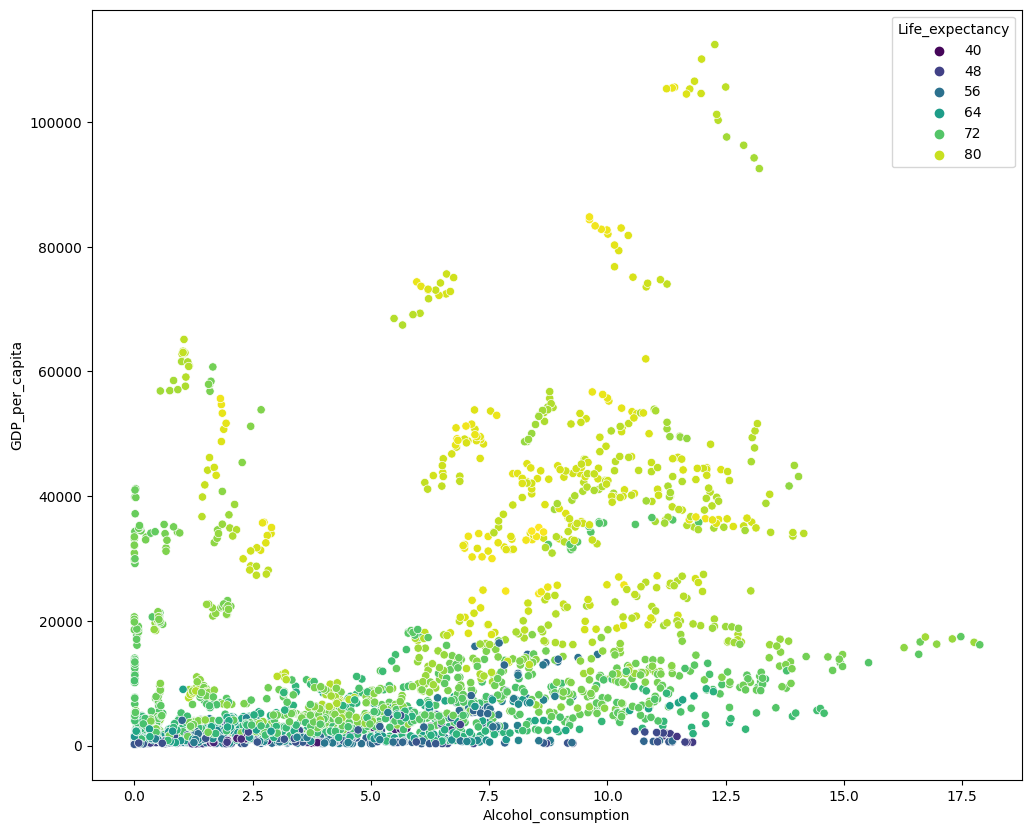

In [19]:
plt.figure(figsize=(12, 10), dpi=100)
sns.scatterplot(x=df['Alcohol_consumption'], y=df['GDP_per_capita'], hue=df['Life_expectancy'], palette='viridis');

I will create dummy features to represent the 'Region' feature since there are few regions.

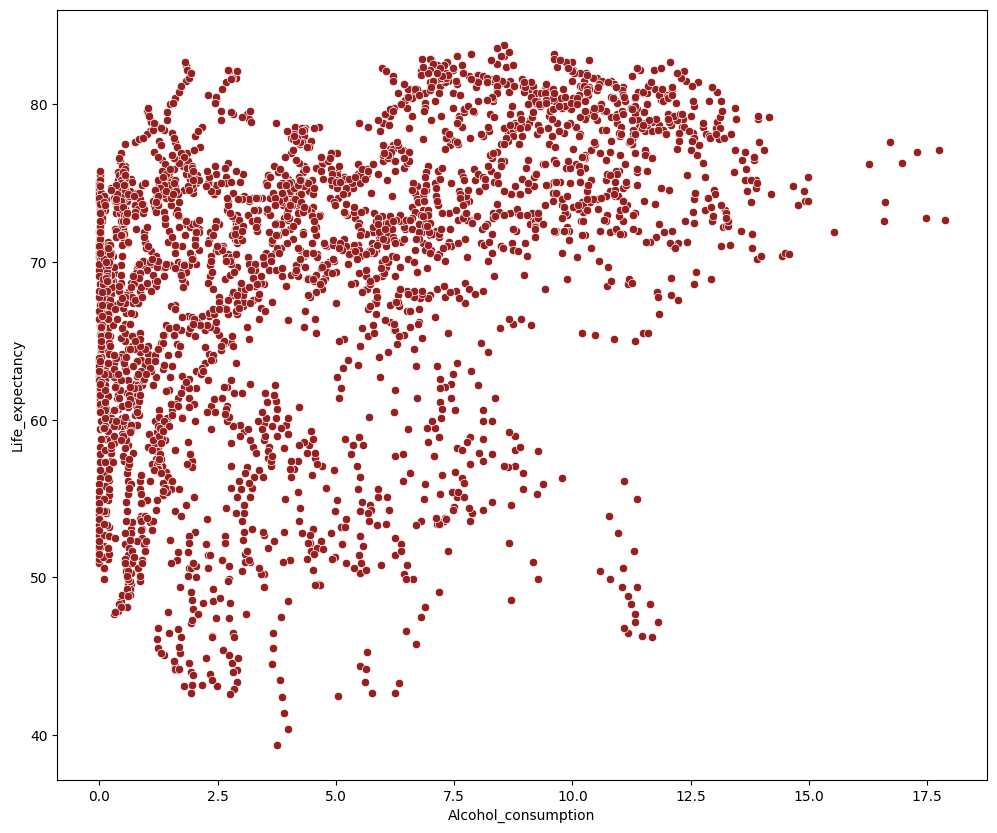

In [20]:
plt.figure(figsize=(12, 10), dpi=100)
sns.scatterplot(x=df['Alcohol_consumption'], y=df['Life_expectancy'], color='#962020');

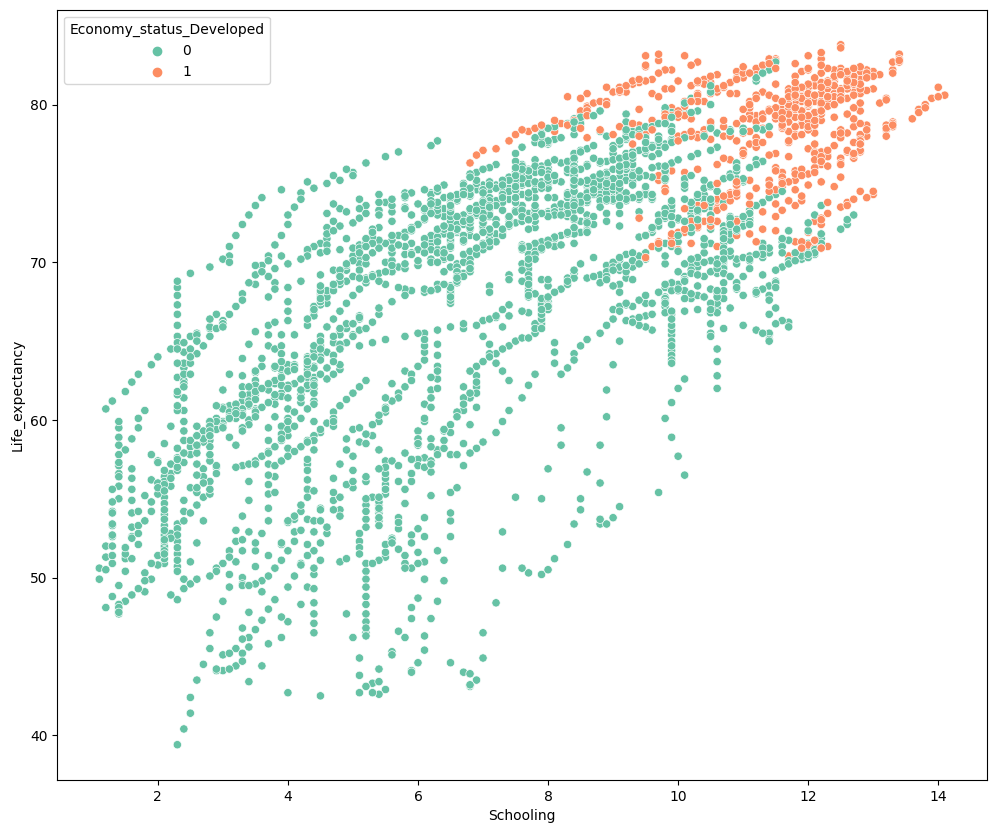

In [21]:
plt.figure(figsize=(12, 10), dpi=100)
sns.scatterplot(x=df['Schooling'], y=df['Life_expectancy'], hue=df['Economy_status_Developed'], palette='Set2');

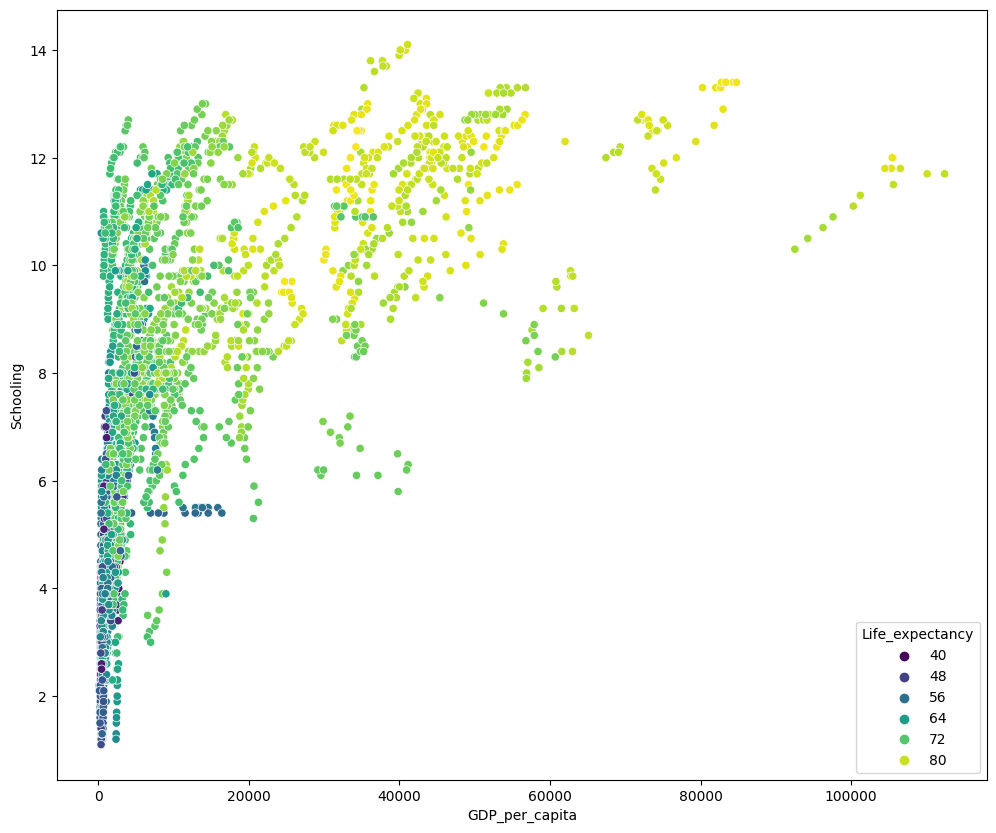

In [22]:
plt.figure(figsize=(12, 10), dpi=100)
sns.scatterplot(y=df['Schooling'], x=df['GDP_per_capita'], hue=df['Life_expectancy'], palette='viridis');

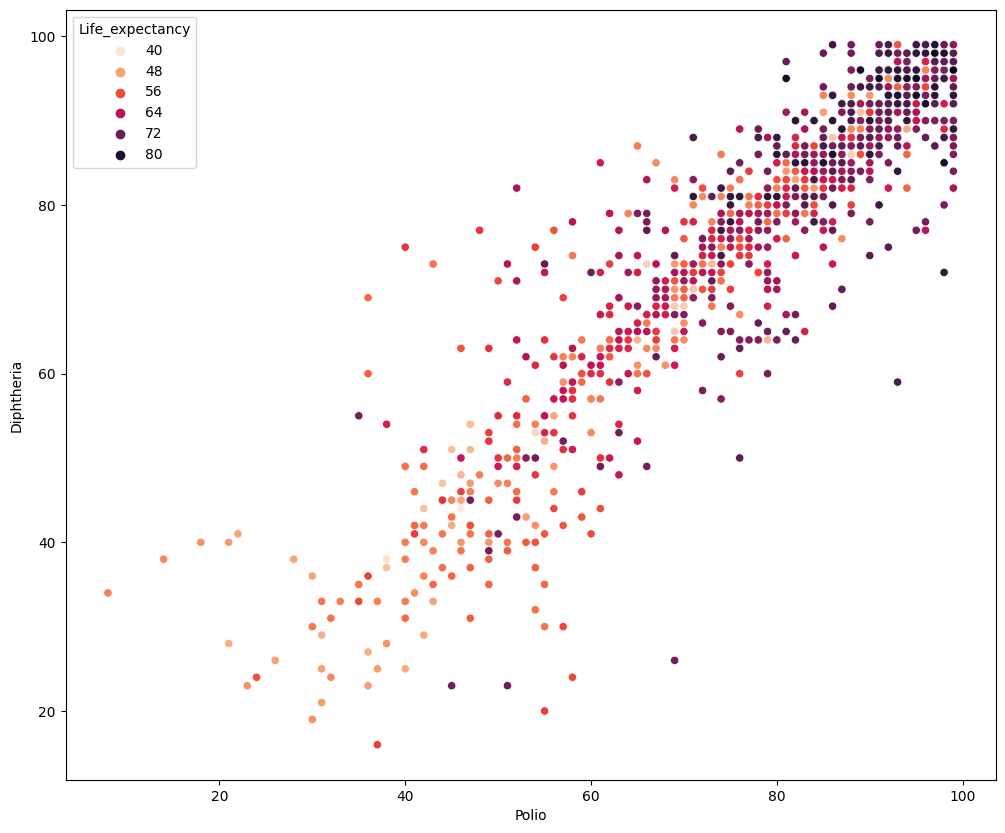

In [23]:
plt.figure(figsize=(12, 10), dpi=100)
sns.scatterplot(x=df['Polio'], y=df['Diphtheria'], hue = df['Life_expectancy'], palette='rocket_r');

In [24]:
df.corr(numeric_only=True)['Life_expectancy'].sort_values(ascending=False)

Life_expectancy                1.000000
Schooling                      0.732484
Polio                          0.641217
Diphtheria                     0.627541
BMI                            0.598423
GDP_per_capita                 0.583090
Economy_status_Developed       0.523791
Measles                        0.490019
Hepatitis_B                    0.417804
Alcohol_consumption            0.399159
Year                           0.174359
Population_mln                 0.026298
Thinness_five_nine_years      -0.458166
Thinness_ten_nineteen_years   -0.467824
Economy_status_Developing     -0.523791
Incidents_HIV                 -0.553027
Infant_deaths                 -0.920032
Under_five_deaths             -0.920419
Adult_mortality               -0.945360
Name: Life_expectancy, dtype: float64

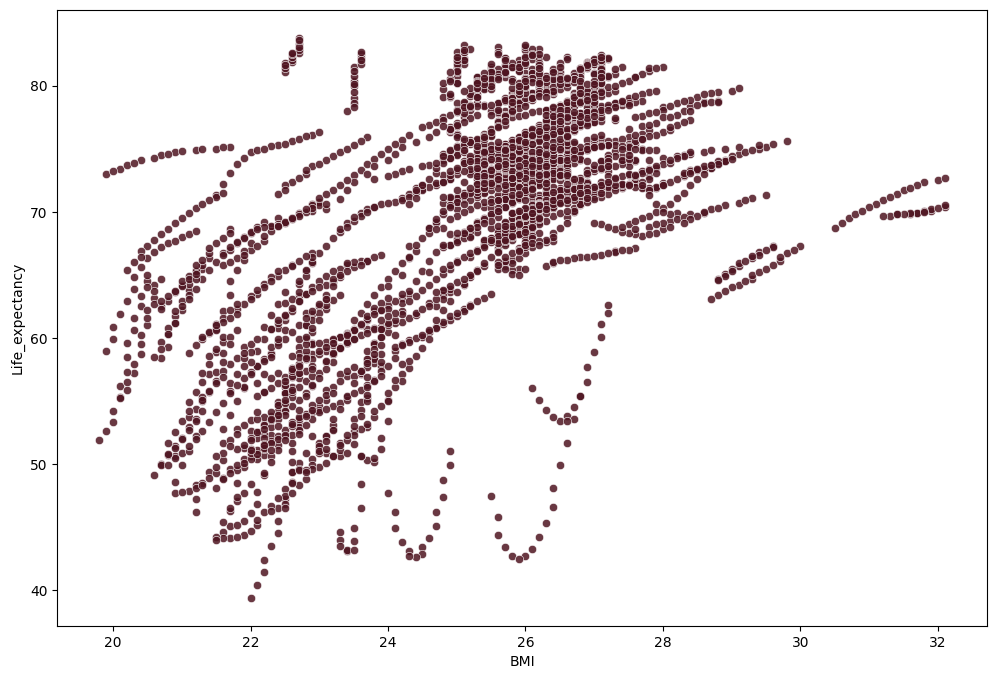

In [25]:
plt.figure(figsize=(12, 8), dpi=100)
sns.scatterplot(x=df['BMI'], y=df['Life_expectancy'], color='#4f1521', alpha=0.85);

Text(0.5, 0, 'Schooling')

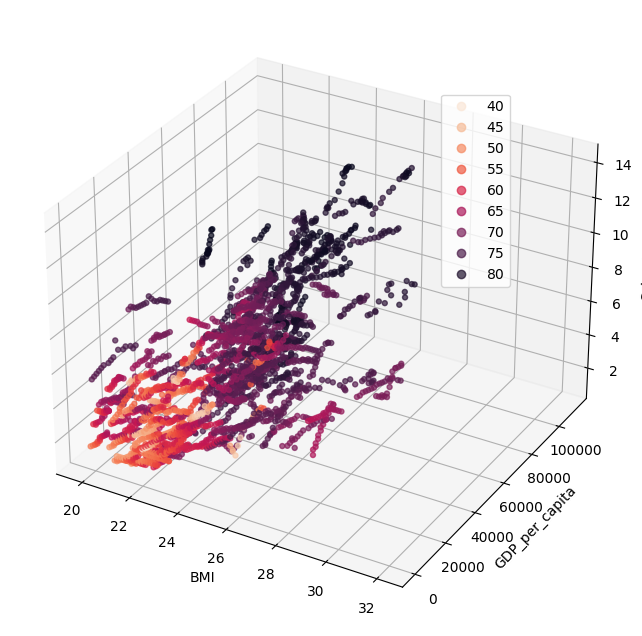

In [26]:
plt.figure(figsize=(8,8), dpi=100)
ax = plt.axes(projection='3d')
pl = ax.scatter3D(df['BMI'], df['GDP_per_capita'], df['Schooling'], c=df['Life_expectancy'], s=13,
            cmap='rocket_r', alpha=0.7)
plt.legend(*pl.legend_elements(), loc=(0.7, 0.55))
ax.set_xlabel('BMI')
ax.set_ylabel('GDP_per_capita')
ax.set_zlabel('Schooling')

In [27]:
df = pd.get_dummies(df, columns=['Region'], prefix=['Region'], dtype=int)

In [28]:
df.head()

,Country,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,...,Life_expectancy,Region_Africa,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,Turkiye,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,...,76.5,0,0,0,0,1,0,0,0,0
1,Spain,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,...,82.8,0,0,0,1,0,0,0,0,0
2,India,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,...,65.4,0,1,0,0,0,0,0,0,0
3,Guyana,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,...,67.0,0,0,0,0,0,0,0,0,1
4,Israel,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,...,81.7,0,0,0,0,1,0,0,0,0


Create Train and Test data.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=["Life_expectancy"], axis=1),
    df["Life_expectancy"],
    test_size=0.25,
    random_state=0,
)

I will Binary Encode 'Country' since there are over 100+ country entries. 

In [30]:
encoder = BinaryEncoder(cols=["Country"], drop_invariant=True)

In [31]:
encoder.fit(X_train)

X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)

In [32]:
X_train_enc.head()

,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Year,Infant_deaths,...,Economy_status_Developing,Region_Africa,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
2122,0,0,0,0,0,0,0,1,2011,3.8,...,0,0,0,0,0,0,0,1,0,0
899,0,0,0,0,0,0,1,0,2012,4.9,...,0,0,0,0,0,0,1,0,0,0
1735,0,0,0,0,0,0,1,1,2000,85.0,...,1,1,0,0,0,0,0,0,0,0
2790,0,0,0,0,0,1,0,0,2007,8.1,...,1,0,0,0,0,1,0,0,0,0
794,0,0,0,0,0,1,0,1,2009,27.8,...,1,0,1,0,0,0,0,0,0,0


# <span style="color:#5E6997">Predict Life Expectancy</span> <a class="anchor" id="predict"></a>

Create the linear regression model.

In [33]:
regressor = LinearRegression()
regressor.fit(X_train_enc, y_train)

LinearRegression()

Make predictions.

In [34]:
y_pred = regressor.predict(X_test_enc)

Evaluate the model performance.

In [35]:
r2_score(y_test, y_pred)

0.9841480602299543

Best so far: 0.9841480602299543